# IoT·인공지능·빅데이터 개론 및 실습 <br> 3/8 Logistic Regerssion & Neural Network with Scikit-Learn

Adapted by Seonwoo Min from the "An Introduction to Machine Learning with Scikit-learn" tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In this excercise, we will cover:

* Loading an example dataset & preprocessing
* Logistic regression & neural network models in scikit-learn
* Model training & prediction & evaluation
* Model save & load
* Homework

## 1. Loading an example dataset & preprocessing

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [11]:
# Data shape & statistics
print("Data: ", data['data'].shape)
print("Label:", data['target'].shape)

# Print the number of samples for each class
import numpy as np
#################### To Do #################################

print(np.unique(data['target']))

print(np.sum(data['target'] == 0))

for c in range(10):
  is_in_this_class = data['target'] == c
  count = np.sum(is_in_this_class)
  print('In class %d, %d' % (c, count))

############################################################

Data:  (1797, 64)
Label: (1797,)
[0 1 2 3 4 5 6 7 8 9]
178
In class 0, 178
In class 1, 182
In class 2, 177
In class 3, 183
In class 4, 181
In class 5, 182
In class 6, 181
In class 7, 179
In class 8, 174
In class 9, 180


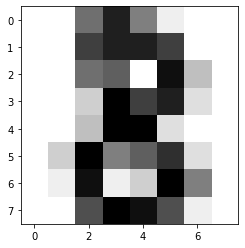

In [17]:
#############################################################
# Data Visaulization
#############################################################
import matplotlib.pyplot as plt
%matplotlib inline

#################### To Do #################################
plt.imshow(data['data'][8].reshape(8, 8), cmap=plt.cm.gray_r)
plt.show()

############################################################

In [19]:
#############################################################
# 1st Preprocessing
# Use the first 20 samples in each clss as test data
# Use the others as training data
#############################################################
train_data = []
test_data = []

train_target = []
test_target = []
#################### To Do #################################

N = len(data['data'])
for c in range(10):
  is_in_this_class = data['target'] == c  # boolean (1797,)
  
  data_in_this_class = data['data'][is_in_this_class]  # (178, 64)
  target_in_this_class = data['target'][is_in_this_class]
  
  test_data.append(data_in_this_class[:20])
  train_data.append(data_in_this_class[20:])
  test_target.append(target_in_this_class[:20])
  train_target.append(target_in_this_class[20:])

test_data = np.concatenate(test_data)
train_data = np.concatenate(train_data)
test_target = np.concatenate(test_target)
train_target = np.concatenate(train_target)

############################################################

print(test_data.shape)
print(train_data.shape)

(200, 64)
(1597, 64)


In [20]:
#############################################################
# 2nd Preprocessing
# Let's use only 2 and 3 for binary classification
#############################################################

#################### To Do #################################
train_data23 = []
test_data23 = []

train_target23 = []
test_target23 = []
#################### To Do #################################

N = len(data['data'])
for c in [2, 3]:
  is_in_this_class = data['target'] == c  # boolean (1797,)
  
  data_in_this_class = data['data'][is_in_this_class]  # (178, 64)
  target_in_this_class = data['target'][is_in_this_class]
  
  test_data23.append(data_in_this_class[:20])
  train_data23.append(data_in_this_class[20:])
  test_target23.append(target_in_this_class[:20])
  train_target23.append(target_in_this_class[20:])

test_data23 = np.concatenate(test_data23)
train_data23 = np.concatenate(train_data23)
test_target23 = np.concatenate(test_target23)
train_target23 = np.concatenate(train_target23)

############################################################

print(test_data23.shape)
print(train_data23.shape)

(40, 64)
(320, 64)


## 2. Logistic regression & neural network models in scikit-learn

For full documentations refer to the following links: <br>
Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
Neural network: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [46]:
#############################################################
# Logistic regression model
#############################################################
# Training
LR = LogisticRegression(max_iter=100)
LR.fit(train_data23, train_target23)

# Prediction
train_predict23 = LR.predict(train_data23)
train_prob23 = LR.predict_proba(train_data23)
test_predict23 = LR.predict(test_data23)
test_prob23 = LR.predict_proba(test_data23)
# print("test_target     :", test_target23)
print("test_prediction :", test_predict23)
print("train_prob :", train_prob23[:10])
print("test_prob :", test_prob23[:10])

#################### To Do #################################

is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)


############################################################

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_prediction : [2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
train_prob : [[9.98553352e-01 1.44664815e-03]
 [9.99990290e-01 9.70995346e-06]
 [9.99998794e-01 1.20575173e-06]
 [9.99999994e-01 5.94653124e-09]
 [9.99999681e-01 3.19365540e-07]
 [9.99772629e-01 2.27370569e-04]
 [9.99978442e-01 2.15583586e-05]
 [9.99999467e-01 5.33074258e-07]
 [9.99988787e-01 1.12131973e-05]
 [9.99781428e-01 2.18572475e-04]]
test_prob : [[9.94353425e-01 5.64657493e-03]
 [9.99964310e-01 3.56903036e-05]
 [9.99999359e-01 6.41277777e-07]
 [9.94463388e-01 5.53661244e-03]
 [9.99520423e-01 4.79576988e-04]
 [5.18924810e-01 4.81075190e-01]
 [9.36606065e-01 6.33939352e-02]
 [9.90440567e-01 9.55943251e-03]
 [4.88854962e-02 9.51114504e-01]
 [9.99999877e-01 1.23192564e-07]]
train_acc : 1.0
test_acc  : 0.975


In [71]:
#############################################################
# Neural network model
#############################################################

#################### To Do #################################
# Training
NN = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', learning_rate_init=1e-2, max_iter=100)
NN.fit(train_data23, train_target23)

# Prediction
train_predict23 = NN.predict(train_data23)
train_prob23 = NN.predict_proba(train_data23)
test_predict23 = NN.predict(test_data23)
test_prob23 = NN.predict_proba(test_data23)
# print("test_target     :", test_target23)
# print("test_prediction :", test_predict23)
# print("train_prob :", train_prob23[:10])
# print("test_prob :", test_prob23[:10])

#################### To Do #################################

is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)


############################################################

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)
############################################################

train_acc : 1.0
test_acc  : 1.0


## 4. Model save & load

In [72]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 

# load
NN_load = joblib.load('models/NN23.joblib') 

#################### To Do #################################

############################################################

## 5. Homework
Now it's your job to experiment with models and achieve higher accuracy on the  **<font color=red>on the entire dataset</font>**. <br>
Try different hyperparameter configurations and save the final model as "final_model.joblib" <br>
Submit the current **notebook file and the saved final model** on ETL.
* Maximum 10 points for >= 97% accuracy on the test set
* Maximum 8 points for >= 96% accuracy on the test set
* Maximum 6 points for >= 95% accuracy on the test set
* Maximum 4 points for >= 94% accuracy on the test set

In [ ]:
#############################################################
# Try different hyperparameters
# Final model training
#############################################################

#################### To Do #################################

############################################################

In [ ]:
#############################################################
# Final model test
# Load the final model and obatin the test accuracy
#############################################################

#################### To Do #################################

############################################################

### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your model.
* Maximum 10 points

fasdfasdfsa